<a href="https://colab.research.google.com/github/Ofir-Manor/Long2/blob/master/311288203_316084623.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center"> HW2 Major</h1>
<h1 align="center"> Algorithm Implementation and Basic Model Selection</h1>


### Table of Contents:

>>>[Table of Contents:](#scrollTo=v1fXDwiEIyxE)

>[Setting the Environment](#scrollTo=Kpg2UySJH5a3)

>[Preliminary: Data Loading](#scrollTo=ChGfAF2uIn-C)

>[Part 1: Basic model selection with k-Nearest Neighbors](#scrollTo=fe8cfb7a-a0f6-4365-a7ee-9266bbb3ff9c)

>>[Question 1:](#scrollTo=86dab325-b0a6-4f9e-80d9-e5fde57dafd5)

>>[Question 2:](#scrollTo=62dcc96a-1343-4958-8383-ec2421cfe9a8)

>>[Question 3:](#scrollTo=f96064d6-97a1-4ac6-a8e3-db1798c0f02c)

>>[Question 4:](#scrollTo=30019235-9df0-44b5-bdd4-68134a461b97)

>>[Question 5:](#scrollTo=64ead7ae-c026-42f2-9d26-6cdf7bb17b26)

>>[Question 6:](#scrollTo=570238ff-02f0-40ac-971b-ebe91f3f1a99)

>[Part 2: Decision trees](#scrollTo=3fa9b3bf-d5a3-4f3b-bd5b-fd9682aca9e8)

>>[Question 7:](#scrollTo=7970df26-7197-4b96-b7e3-c2f0bb73ecc2)

>>[Question 8:](#scrollTo=55f37c56-e197-42a8-abc2-25b33fca79f0)



# Setting the Environment

In [26]:
#@title Setting the Environment:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pylab
from typing import Union
params = {
    'xtick.labelsize': 18,
    'ytick.labelsize': 18,
    'axes.titlesize' : 22,
    'axes.labelsize' : 20,
    'legend.fontsize': 18,
    'legend.title_fontsize': 22,
    'figure.titlesize': 24
 }
pylab.rcParams.update(params)

# Preliminary: Data Loading

In [27]:
#@title Loading the dataset and the code files:

# load prepare.py:
!rm *.py
from google.colab import files
print("Please load prepare.py")
uploadedData = files.upload()
filename = list(uploadedData)[0]

# load visualize_clf.py:
from google.colab import files
print("Please load visualize_clf.py")
uploadedData = files.upload()
filename = list(uploadedData)[0]


# load the csv file:
!rm *.csv
from google.colab import files
print("Please load the raw csv data")
uploadedData = files.upload()
filename = list(uploadedData)[0]

Please load prepare.py


Saving prepare.py to prepare.py
Please load visualize_clf.py


Saving visualize_clf.py to visualize_clf.py
Please load the raw csv data


Saving virus_data.csv to virus_data.csv


In [28]:
#@title Create DF and split it:

dataset = pd.DataFrame(pd.read_csv(filename))
from sklearn.model_selection import train_test_split
random_state = 3 + 23
train_raw, test_raw = train_test_split(dataset, test_size=0.2, random_state=random_state)

In [29]:
#@title Use `prepare` function:

from prepare import prepare_data
# Prepare training set according to itself
train = prepare_data(train_raw, train_raw)
# Prepare test set according to the raw training set
test = prepare_data(train_raw, test_raw)



---



---



---



# Part 1: Basic model selection with k-Nearest Neighbors

## Question 1

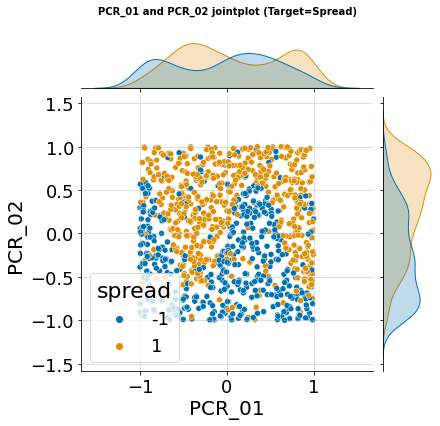

In [30]:
#@title Present jointplot for `PCR_01` vs `PCR_02`:

from sklearn.neighbors import KNeighborsClassifier
from visualize_clf import visualize_clf
train_mod = train.copy()[["PCR_01", "PCR_02", "spread"]]
test_mod = test.copy()[["PCR_01", "PCR_02", "spread"]]
g = sns.jointplot(x="PCR_01",
                  y="PCR_02",
                  data=train_mod,
                  hue='spread',
                  palette='colorblind')
g.fig.suptitle("PCR_01 and PCR_02 jointplot (Target=Spread)",
               fontsize='medium', fontweight='semibold')
g.fig.subplots_adjust(top=0.9) # Reduce plot to make room
g.ax_joint.grid(alpha=0.5)

## Question 2

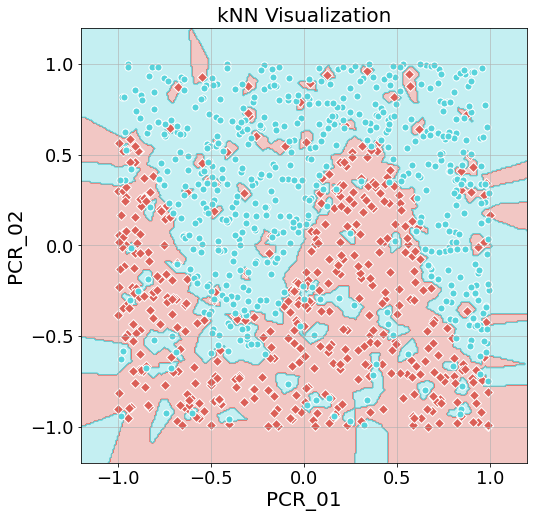

In [31]:
#@title Train a kNN model and visualize the decision regions:

train_mod_x = train_mod[["PCR_01", "PCR_02"]]
train_mod_y = train_mod["spread"]
kNN = KNeighborsClassifier(n_neighbors=1)
kNN.fit(X=train_mod_x.values, y=train_mod_y.values)
visualize_clf(clf=kNN, X=train_mod_x,
              Y=train_mod_y, title="kNN Visualization",
              xlabel="PCR_01",
              ylabel="PCR_02")

## Question 3

In [32]:
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
k_list = list(range(1, 20, 2)) + list(range(20, 871, 85))
cv_train_mean = np.array([])
cv_val_mean = np.array([])
for k in k_list:
    kNN_cv = KNeighborsClassifier(n_neighbors=k)
    cv_results = cross_validate(estimator=kNN_cv, X=train_mod_x,
                                y=train_mod_y, cv=8, return_train_score=True)
    cv_train_mean = np.append(cv_train_mean, np.array(cv_results['train_score']).mean())
    cv_val_mean = np.append(cv_val_mean, np.array(cv_results['test_score']).mean())


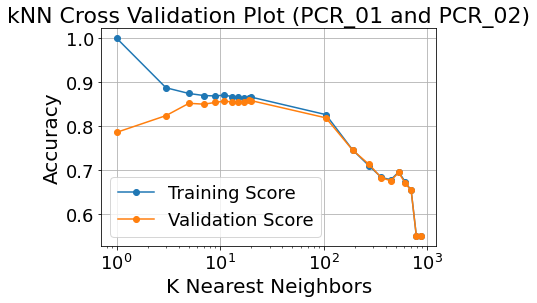

In [33]:
train_line = plt.semilogx(k_list,cv_train_mean, label="Training Score", marker='o')
val_line = plt.semilogx(k_list,cv_val_mean, label="Validation Score", marker='o')
plt.grid(visible=True)
plt.xlabel("K Nearest Neighbors")
plt.ylabel("Accuracy")
plt.title("kNN Cross Validation Plot (PCR_01 and PCR_02)")
plt.legend()
plt.show()

In [34]:
k_opt_idx = np.argmax(cv_val_mean)
k_opt = k_list[k_opt_idx]
print(f"The best k found in out cross validation is: {k_opt}")
print(f"The training accuracy with k={k_opt} is {cv_train_mean[k_opt_idx]}")
print(f"The validation accuracy with k={k_opt} is {cv_val_mean[k_opt_idx]}")

The best k found in out cross validation is: 19
The training accuracy with k=19 is 0.863
The validation accuracy with k=19 is 0.859


## Question 4

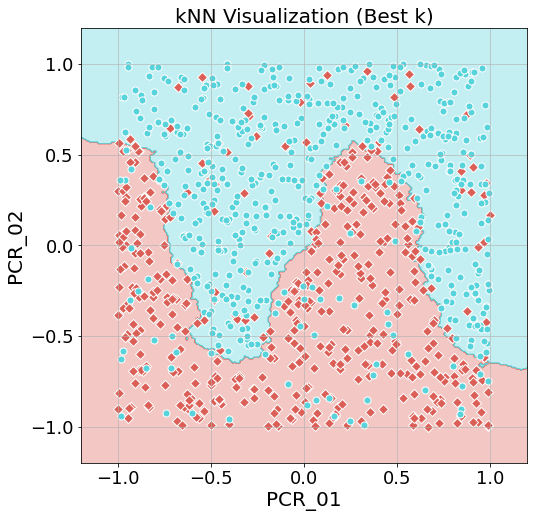

In [35]:
kNN_opt = KNeighborsClassifier(n_neighbors=k_opt)
kNN_opt.fit(X=train_mod_x.values, y=train_mod_y.values)
visualize_clf(clf=kNN_opt,
              X=train_mod_x,
              Y=train_mod_y,
              title="kNN Visualization (Best k)",
              xlabel="PCR_01",
              ylabel="PCR_02")

In [36]:
test_mod_x = test[["PCR_01", "PCR_02"]].copy()
test_mod_y = test["spread"].copy()
acc = kNN_opt.score(X=test_mod_x.values, y=test_mod_y.values)
print(f"Test accuracy is {acc}")

Test accuracy is 0.912


## Question 5

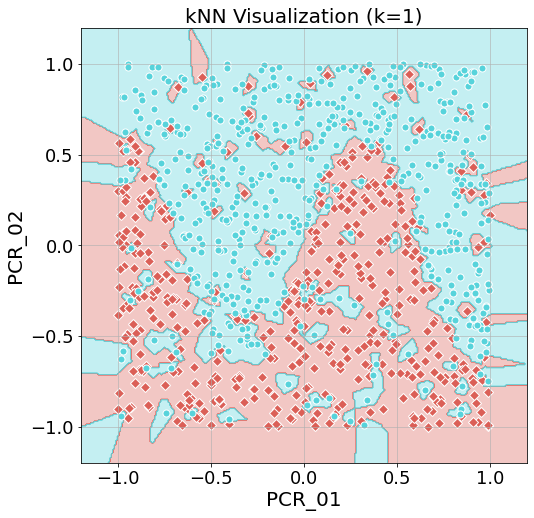

The training accuracy of the kNN model with k=1 is 1.0
The test accuarcy of the kNN model with k=1 is 0.832


In [37]:
kNN1 =  KNeighborsClassifier(n_neighbors=1)
kNN1.fit(X=train_mod_x.values, y=train_mod_y.values)
visualize_clf(clf=kNN1,
              X=train_mod_x,
              Y=train_mod_y,
              title="kNN Visualization (k=1)",
              xlabel="PCR_01",
              ylabel="PCR_02")
train_acc = kNN1.score(X=train_mod_x.values, y=train_mod_y.values)
test_acc = kNN1.score(X=test_mod_x.values, y=test_mod_y.values)
print(f"The training accuracy of the kNN model with k=1 is {train_acc}")
print(f"The test accuarcy of the kNN model with k=1 is {test_acc}")

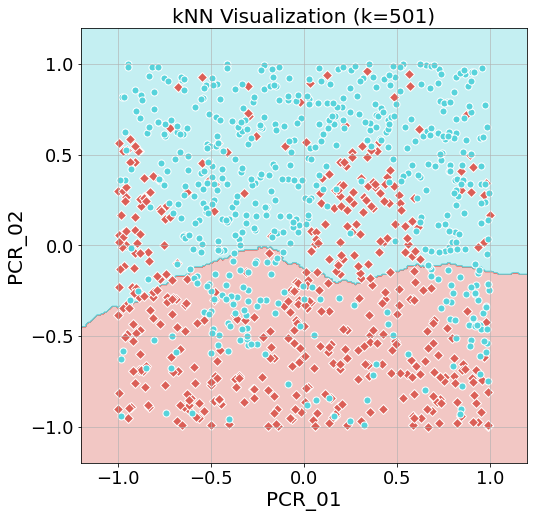

The training accuracy of the kNN model with k=1 is 0.677
The test accuarcy of the kNN model with k=1 is 0.764


In [38]:
kNN501 =  KNeighborsClassifier(n_neighbors=501)
kNN501.fit(X=train_mod_x.values, y=train_mod_y.values)
visualize_clf(clf=kNN501,
              X=train_mod_x,
              Y=train_mod_y,
              title="kNN Visualization (k=501)",
              xlabel="PCR_01",
              ylabel="PCR_02")
train_acc = kNN501.score(X=train_mod_x.values, y=train_mod_y.values)
test_acc = kNN501.score(X=test_mod_x.values, y=test_mod_y.values)
print(f"The training accuracy of the kNN model with k=1 is {train_acc}")
print(f"The test accuarcy of the kNN model with k=1 is {test_acc}")

## Question 6

In [39]:
train_x = train[train.columns.difference(['spread', 'risk'])]
train_y = train["spread"]
cv_train_mean = np.array([])
cv_val_mean = np.array([])
for k in k_list:
    kNN_cv = KNeighborsClassifier(n_neighbors=k)
    cv_results = cross_validate(estimator = kNN_cv, X=train_x, y=train_y, cv=8, return_train_score=True)
    cv_train_mean = np.append(cv_train_mean, np.array(cv_results['train_score']).mean())
    cv_val_mean = np.append(cv_val_mean, np.array(cv_results['test_score']).mean())

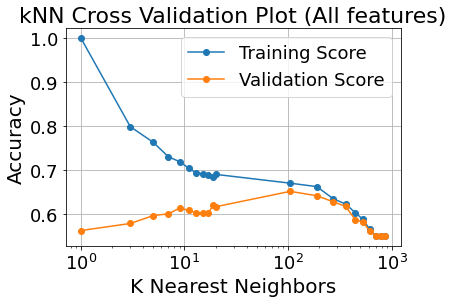

In [40]:
train_line = plt.semilogx(k_list,cv_train_mean, label="Training Score", marker='o')
val_line = plt.semilogx(k_list,cv_val_mean, label="Validation Score", marker='o')
plt.grid(visible=True)
plt.xlabel("K Nearest Neighbors")
plt.ylabel("Accuracy")
plt.title("kNN Cross Validation Plot (All features)")
plt.legend()
plt.show()

In [41]:
k_opt_idx = np.argmax(cv_val_mean)
k_opt = k_list[k_opt_idx]
print(f"The best k found in out cross validation is: {k_opt}")
print(f"The training accuracy with k={k_opt} is {cv_train_mean[k_opt_idx]}")
print(f"The validation accuracy with k={k_opt} is {cv_val_mean[k_opt_idx]}")

The best k found in out cross validation is: 105
The training accuracy with k=105 is 0.6705714285714286
The validation accuracy with k=105 is 0.652




---


---



---




# Part 2: Decision trees

## Question 7

In [42]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dec_tree = DecisionTreeClassifier(criterion="entropy", max_depth=4)
train_x = train[train.columns.difference(['spread', 'risk'])]
train_y = train['risk']
dec_tree.fit(X=train_x, y=train_y)
train_score = dec_tree.score(X=train_x, y=train_y)
print(f"The training accuracy is {train_score}")

The training accuracy is 0.795


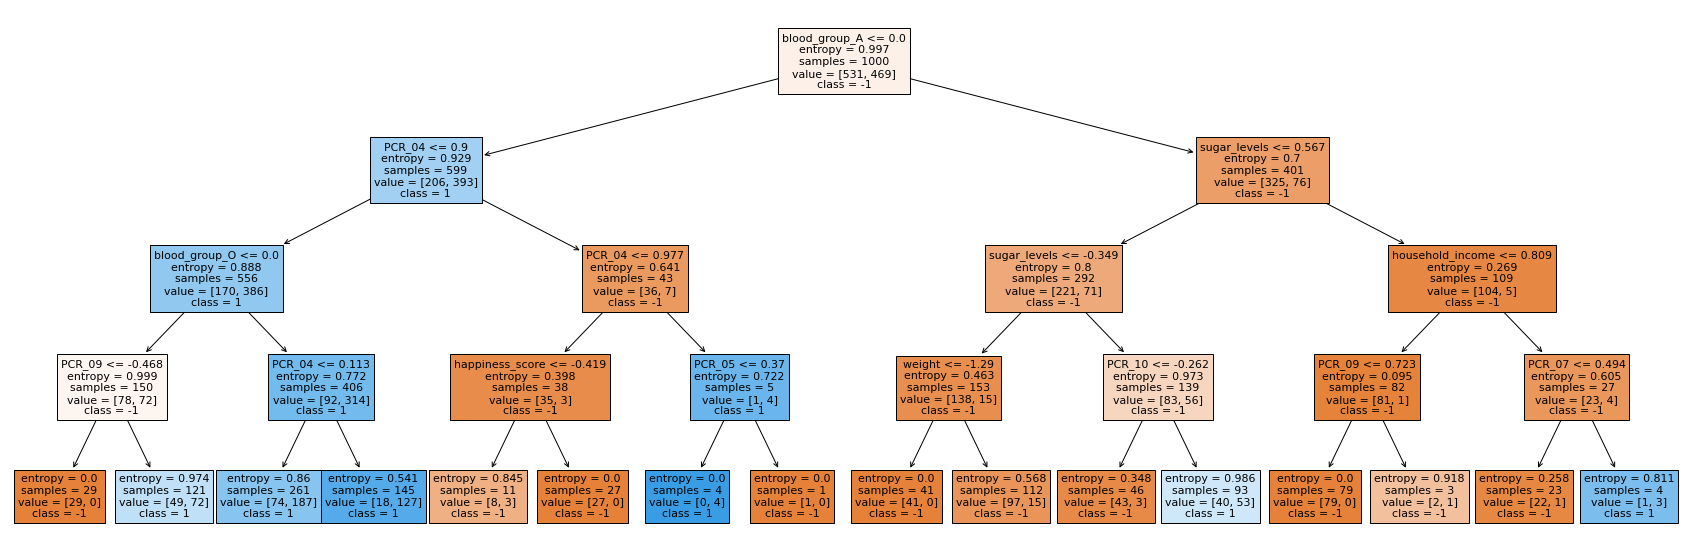

In [43]:
plt.figure(figsize=(30,10))
plot_tree(decision_tree=dec_tree,
          filled=True,
          feature_names=train.columns.difference(['spread', 'risk']),
          class_names=["-1", "1"],
        fontsize=11)
plt.show()

In [44]:
from sklearn.model_selection import GridSearchCV
min_samples_list = list(range(10,24,2))
max_depth_list = list(range(6,13,1))
parameters = {'max_depth':max_depth_list, 'min_samples_leaf':min_samples_list}
dec_tree = DecisionTreeClassifier(criterion="entropy")
grid_search = GridSearchCV(estimator=dec_tree, param_grid=parameters,cv=8,return_train_score=True)
grid_search.fit(X=train_x, y=train_y)

GridSearchCV(cv=8, estimator=DecisionTreeClassifier(criterion='entropy'),
             param_grid={'max_depth': [6, 7, 8, 9, 10, 11, 12],
                         'min_samples_leaf': [10, 12, 14, 16, 18, 20, 22]},
             return_train_score=True)

In [45]:
mean_train_score = grid_search.cv_results_["mean_train_score"].reshape(len(max_depth_list),len(min_samples_list))
mean_test_score = grid_search.cv_results_["mean_test_score"].reshape(len(max_depth_list),len(min_samples_list))

Text(0.5, 1.0, 'Mean Validation Accuracy')

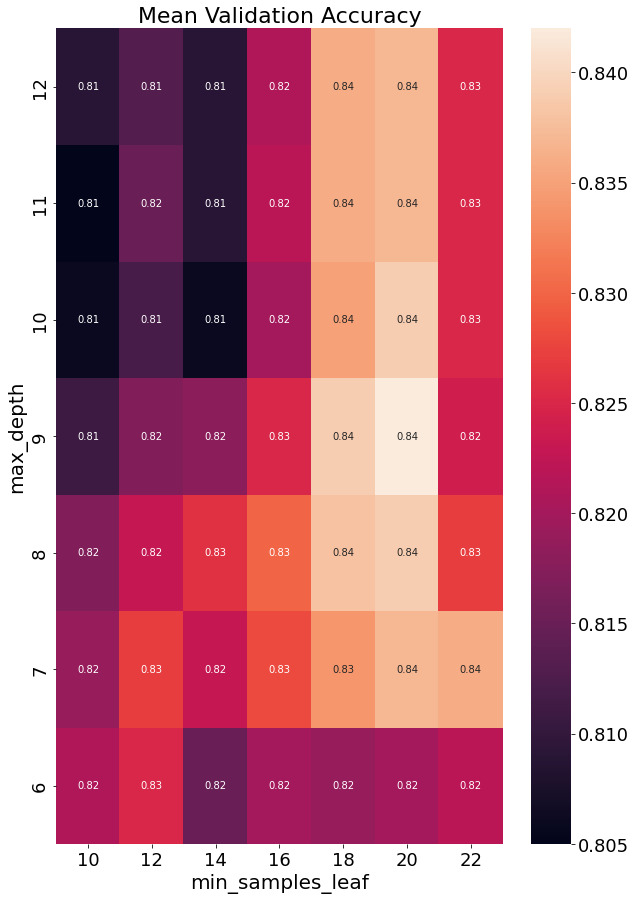

In [46]:
plt.figure(figsize=(10,15))
ax_test = sns.heatmap(mean_test_score, annot=True, xticklabels=min_samples_list, yticklabels=max_depth_list)
ax_test.set(xlabel="min_samples_leaf", ylabel="max_depth")
ax_test.invert_yaxis()
ax_test.set_title("Mean Validation Accuracy")

Text(0.5, 1.0, 'Mean Training Accuracy')

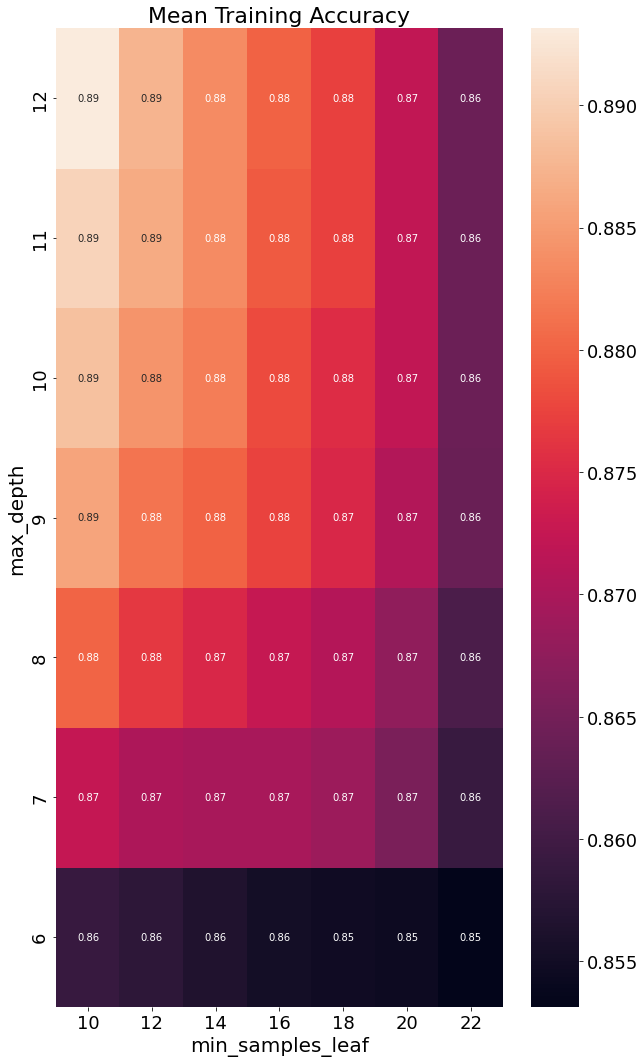

In [47]:
plt.figure(figsize=(10,18))
ax_train = sns.heatmap(mean_train_score, annot=True, xticklabels=min_samples_list, yticklabels=max_depth_list)
ax_train.set(xlabel="min_samples_leaf", ylabel="max_depth")
ax_train.invert_yaxis()
ax_train.set_title("Mean Training Accuracy")

## Question 9

In [48]:
#Extract Params Dict from CV Grid Results
df_check = pd.DataFrame.from_dict(grid_search.cv_results_)
idx_max = df_check[["mean_test_score"]].idxmax().values[0]
params_opt = df_check[["params"]].iloc[[idx_max]].values[0][0]

max_depth_opt = params_opt["max_depth"]
min_samples_leaf_opt = params_opt["min_samples_leaf"]
test_x = test[test.columns.difference(['spread', 'risk'])]
test_y = test['risk']

dec_tree_opt = DecisionTreeClassifier(criterion="entropy", max_depth=max_depth_opt, min_samples_leaf=min_samples_leaf_opt)
dec_tree_opt.fit(X=train_x, y=train_y)
score = dec_tree_opt.score(X=test_x, y=test_y)
print(f"The accuracy of the decision tree with max_depth={max_depth_opt} and min_samples_leaf={min_samples_leaf_opt} is {score}")

The accuracy of the decision tree with max_depth=9 and min_samples_leaf=20 is 0.84




---



---



---



# Part 3: Linear SVM and the Polynomial kernel

## Question 10

In [49]:
# load SoftSVM.py:
from google.colab import files
print("Please load SoftSVM.py")
uploadedData = files.upload()
filename = list(uploadedData)[0]

# load verify_gradients.py:
from google.colab import files
print("Please load verify_gradients.py")
uploadedData = files.upload()
filename = list(uploadedData)[0]

Please load SoftSVM.py


Saving SoftSVM.py to SoftSVM.py
Please load verify_gradients.py


Saving verify_gradients.py to verify_gradients.py


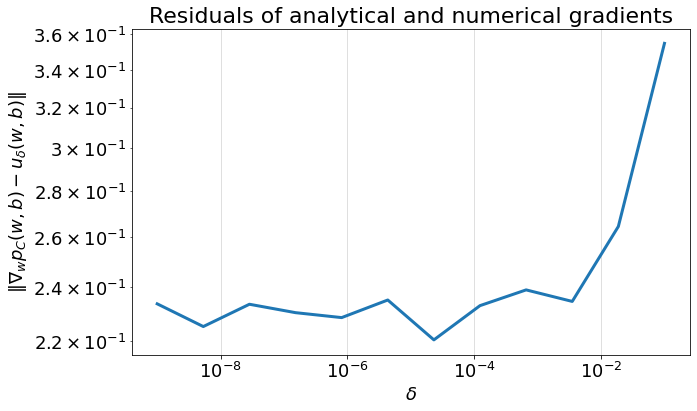

In [50]:
from SoftSVM import SoftSVM
from verify_gradients import compare_gradients

train_mod_x = train_mod[["PCR_01", "PCR_02"]]
train_mod_y = train_mod["spread"]

compare_gradients(train_mod_x.to_numpy(), train_mod_y.to_numpy(), deltas=np.logspace(-9, -1, 12))

## Question 11

In [54]:
for lr in np.logspace(-3, 0, 4):
  clf = SoftSVM(C=0.1, lr=lr)
  losses, accuracies = clf.fit_with_logs(train_mod_x.to_numpy(), train_mod_y.to_numpy(), max_iter=3000)
  plt.figure(figsize=(13, 6))
  plt.subplot(121), plt.grid(alpha=0.5), plt.title ("TODO1")
  plt.semilogy(losses), plt.xlabel("TODO2"), plt.ylabel("TODO3")
  plt.subplot(122), plt.grid(alpha=0.5), plt.title ("TODO4")
  plt.plot(accuracies), plt.xlabel("TODO5"), plt.ylabel("TODO6")

ValueError: ignored